# Performing Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('dark_background')
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.size'] = 3

In [3]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
data['default payment next month'].mean()

0.2217971797179718

In [5]:
data.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
lr_model = LogisticRegression(C = 1.0, 
                              class_weight = None, 
                              dual = False, 
                              fit_intercept = True,
                             intercept_scaling = 1,
                             max_iter = 100,
                             multi_class = 'auto',
                             n_jobs = None,
                             penalty = 'l2',
                             random_state = None,
                             solver = 'warn',
                             tol = 0.0001,
                             verbose = 0,
                             warm_start = False)

In [8]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
X = data['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [11]:
y = data['default payment next month'][0:10].values
print(y)

[1 1 0 0 0 0 0 0 0 0]


In [12]:
lr_model.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Creating the array of predicted probabilities for the testing data.

In [13]:
new_X = data['EDUCATION'][10:20].values.reshape(-1,1)
print(new_X)

[[3]
 [1]
 [2]
 [2]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]]


In [15]:
lr_model.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
data['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
np.random.seed(seed = 1)

X = np.random.uniform(low = 0.0, high = 10.0, size = (1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [18]:
np.random.seed(seed = 1)

slope = 0.25
intercept = -1.25

y = slope * X + np.random.normal(loc = 0.0, scale = 1, size = (1000,)) + intercept

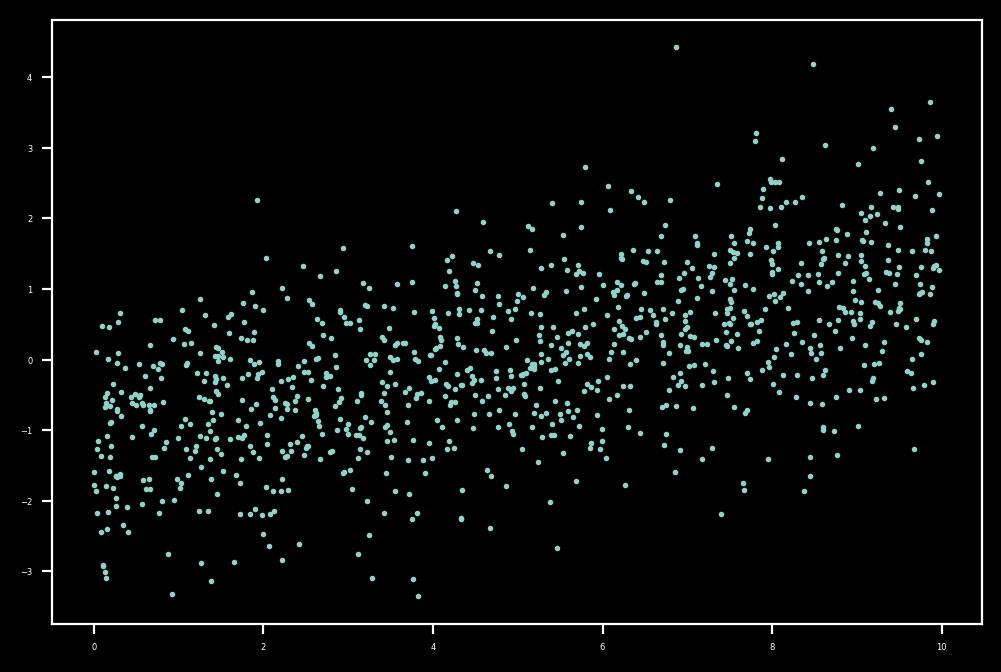

In [19]:
plt.scatter(X, y, s = 1)
plt.show()

In [20]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg
lin_reg.fit(X.reshape(-1,1), y)
print(f"Intercept:{lin_reg.intercept_}, Coefficient:{lin_reg.coef_}")

Intercept:-1.1612566002825888, Coefficient:[0.24002588]


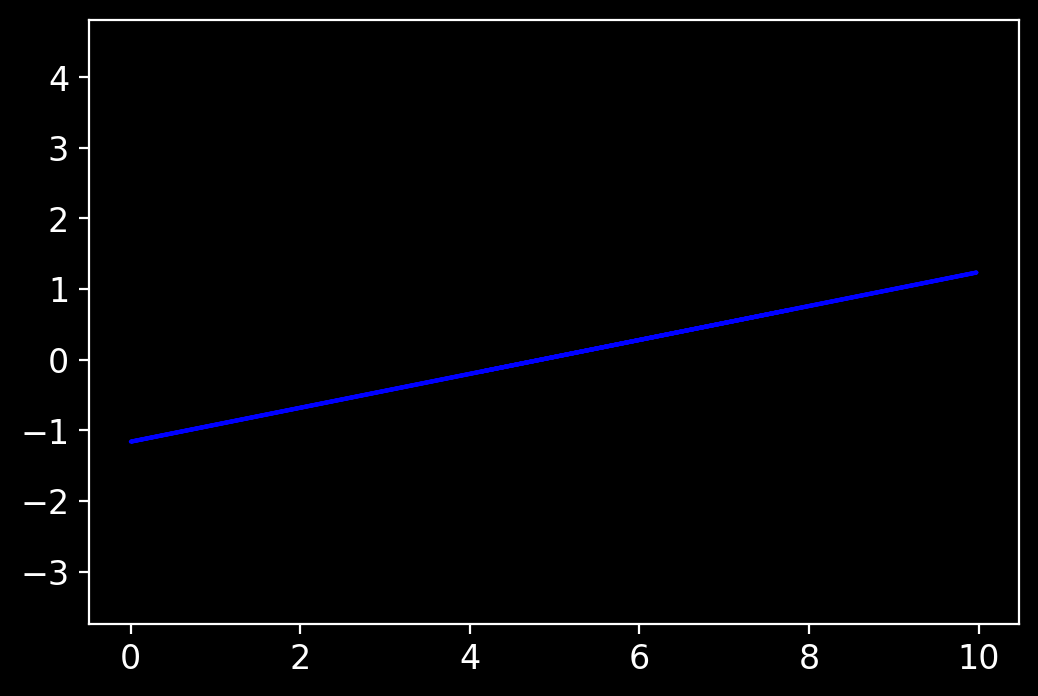

In [54]:
y_pred = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X, y, s = 0)
plt.plot(X, y_pred, 'b')
plt.show()

# Splitting the Data into Training and Testing 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['EDUCATION'].values.reshape(-1,1), data['default payment next month'].values, test_size = 0.2, random_state = 24)

In [52]:
print('Shape of X_train data:', X_train.shape)
print('Shape of X_test data:', X_test.shape)
print('Shape of y_train data:', y_train.shape)
print('Shape of y_test data:', y_test.shape)

Shape of X_train data: (21331, 1)
Shape of X_test data: (5333, 1)
Shape of y_train data: (21331,)
Shape of y_test data: (5333,)


In [24]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


In [26]:

example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [28]:
print(example_lr.score(X_test, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7834239639977498
0.7834239639977498


In [29]:

P = sum(y_test)
P

1155

In [31]:
# Calculating True Positives
TP = sum( (y_test==1) & (y_pred==1) ) 
print(TP)
# Calculating True Positive Rate
TPR = TP/P 
print(TPR)

0
0.0


In [32]:
FN = sum((y_test == 1) & (y_pred == 0))
print(FN)

FNR = FN/P
print(FNR)

1155
1.0


In [35]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4178    0]
 [1155    0]]


In [37]:

y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [39]:

prob_sum = np.sum(y_pred_proba, 1)
print(prob_sum)
print(prob_sum.shape)
print(np.unique(prob_sum))

[1. 1. 1. ... 1. 1. 1.]
(5333,)
[1.]


In [40]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

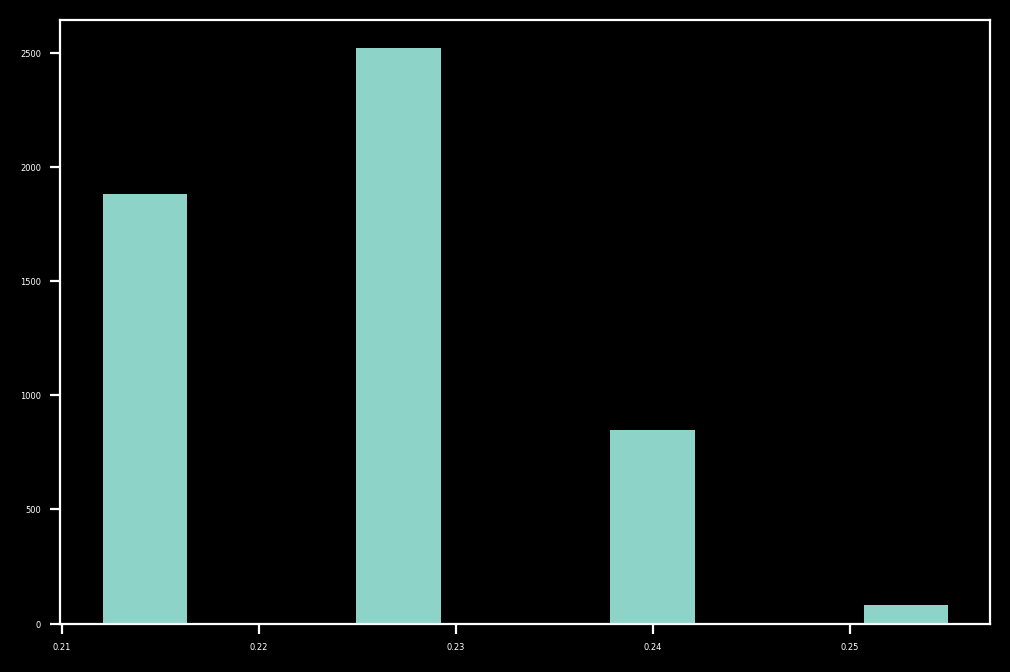

In [41]:
plt.hist(pos_proba)
plt.show()

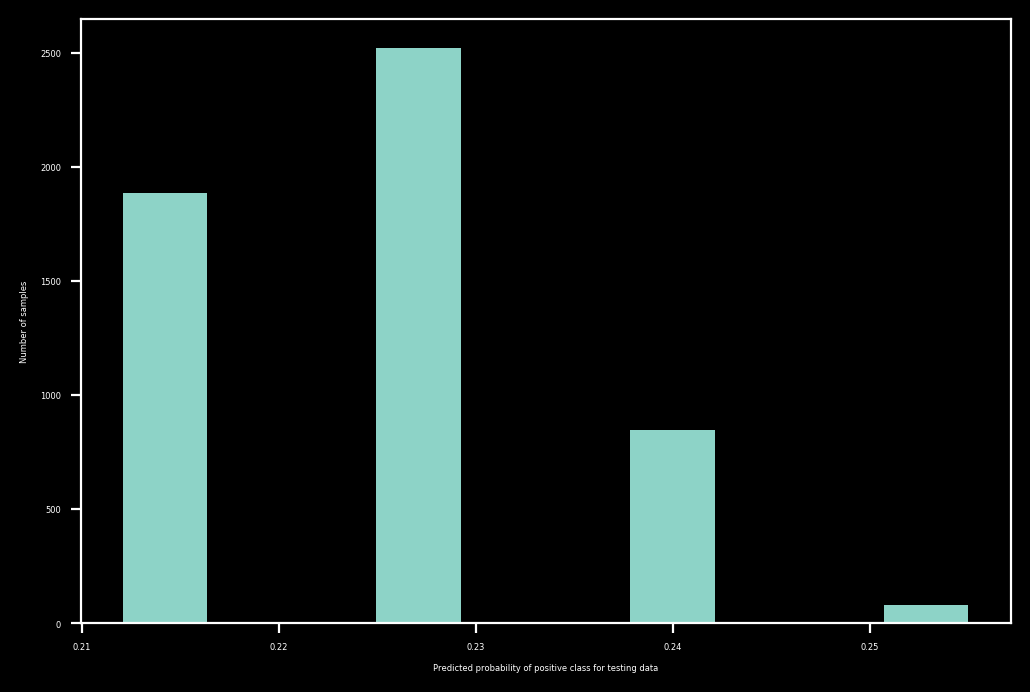

In [61]:
mpl.rcParams['font.size'] = 3
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')
plt.show()

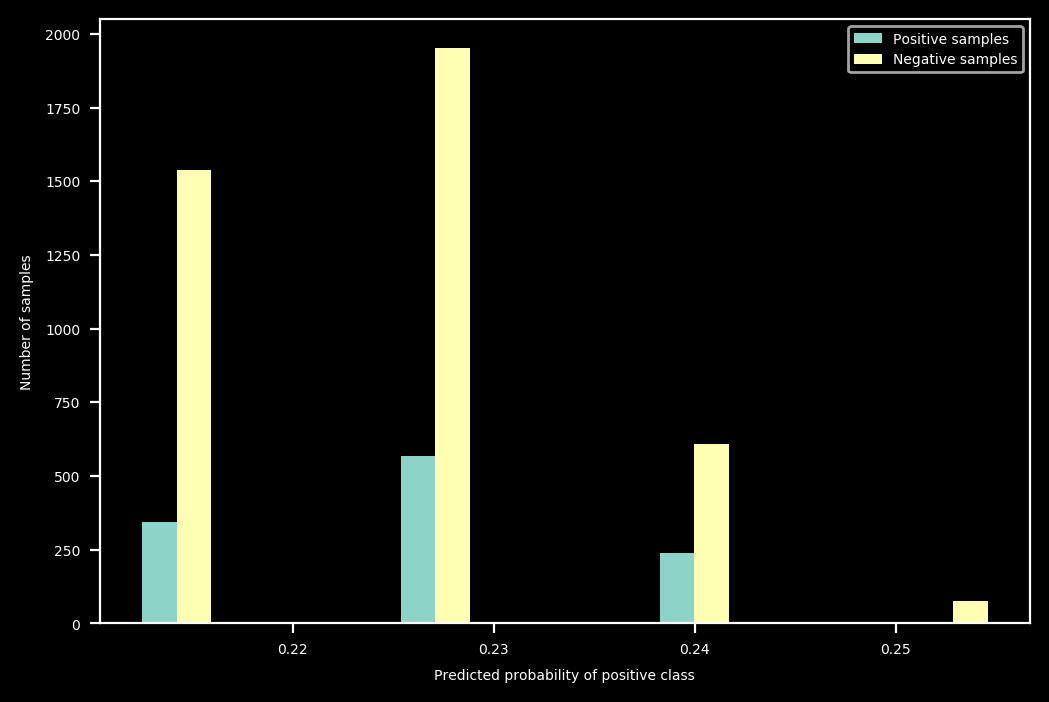

In [58]:

pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='bar')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')
plt.show()

In [45]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(fpr, tpr, thresholds)

[0.         0.01842987 0.16419339 0.63140258 1.        ] [0.         0.004329   0.21212121 0.7030303  1.        ] [1.2549944  0.2549944  0.24007604 0.22576598 0.21207085]


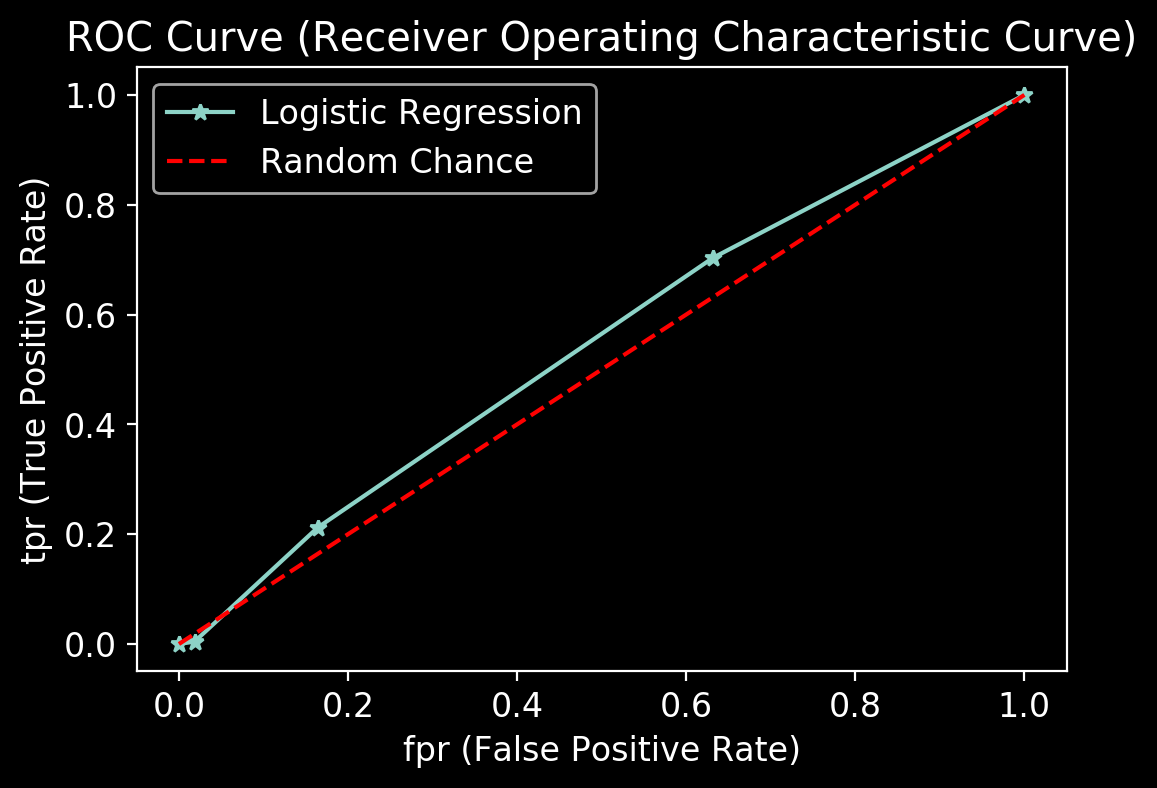

In [46]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve (Receiver Operating Characteristic Curve)')
plt.show()

In [47]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

In [48]:

precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21657604 0.23536232 0.26315789 0.06097561 1.        ] [1.         0.7030303  0.21212121 0.004329   0.        ] [0.21207085 0.22576598 0.24007604 0.2549944 ]


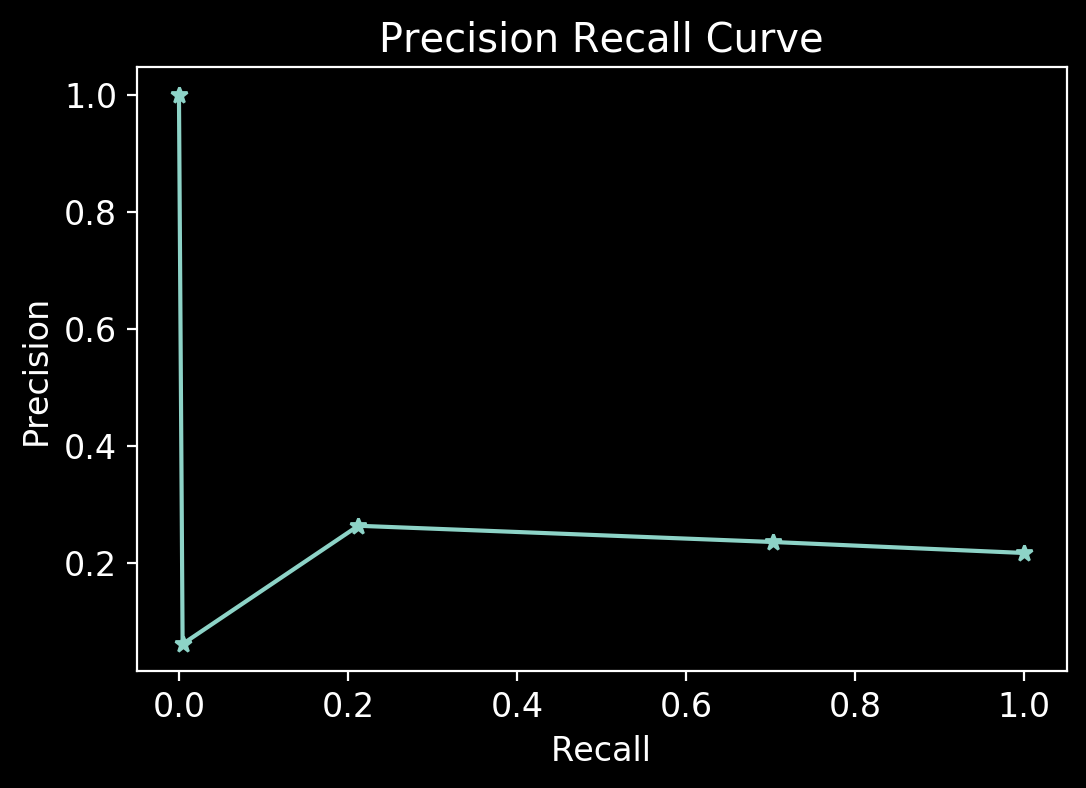

In [49]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [50]:
metrics.auc(recall, precision) # auc is a function used to calculate area under curve

0.22544274282968607

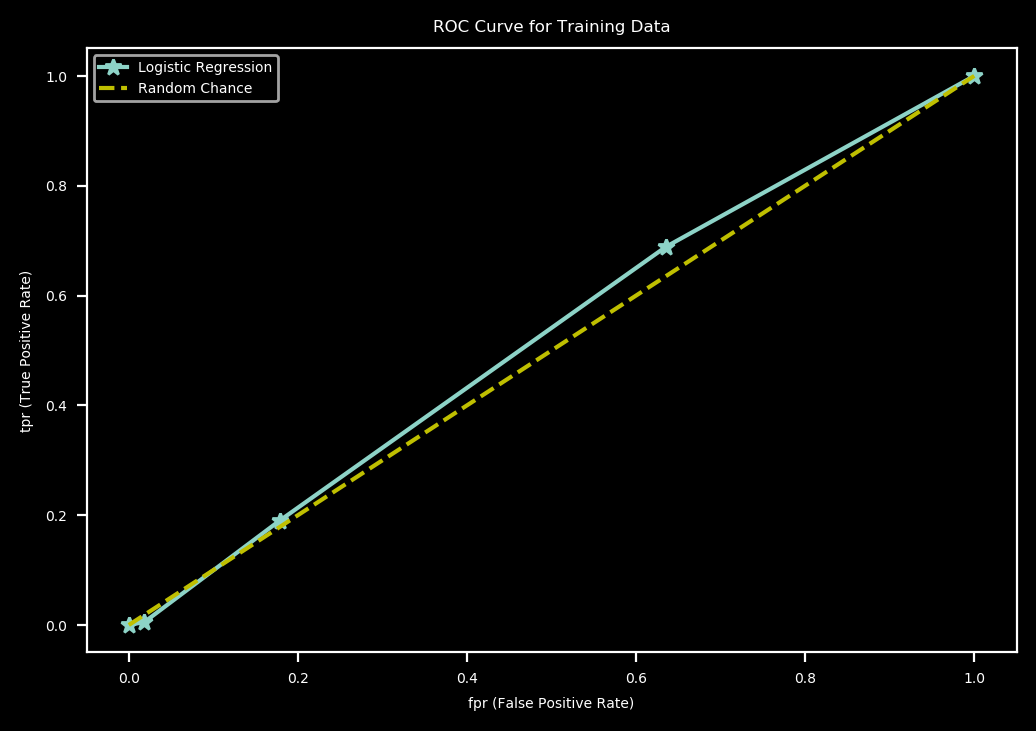

In [60]:

# getting the training samples probability predictions
y_train_prob = example_lr.predict_proba(X_train)

# retriving all positiv class probabilities
train_pos_proba = y_train_prob[:,1]

# getting the required parameters
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_pos_proba)

# plotting roc-auc cuve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'y--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve for Training Data')
plt.show()